In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
df=pd.read_csv('academic_performance.csv')

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [20]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [21]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [25]:
from scipy.stats import zscore

In [26]:
num_cols=["math score","reading score","writing score"]

In [27]:
z_scores=np.abs(zscore(df[num_cols]))

In [28]:
threshold=3

In [29]:
# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

In [30]:
df_no_outliers = df.drop(outlier_indices[0])

In [33]:
outliers = df.iloc[outlier_indices[0]]
print("Outliers:")
print(outliers)

Outliers:
     gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
76     male        group E            some high school      standard   
327    male        group A                some college  free/reduced   
327    male        group A                some college  free/reduced   
596    male        group B                 high school  free/reduced   
596    male        group B                 high school  free/reduced   
787  female        group B                some college      standard   
980  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading scor

In [34]:
print("DataFrame without outliers:")
print(df_no_outliers)

DataFrame without outliers:
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none        

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

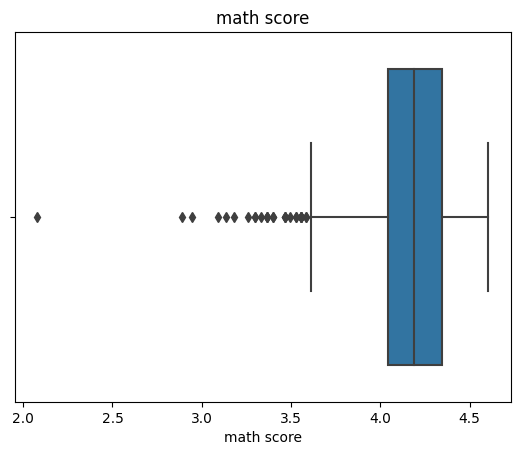

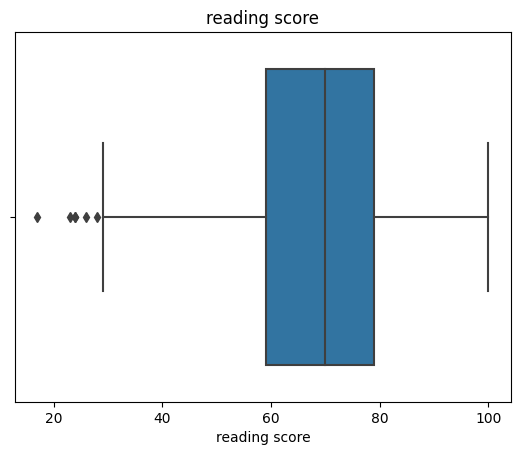

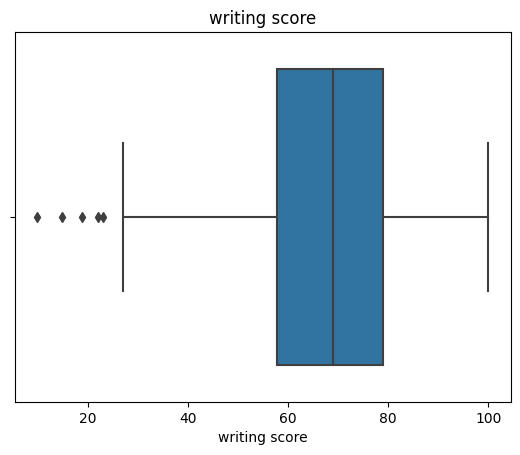

In [46]:
for col in num_cols:
    # Create boxplot to visualize outliers
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()
    
    # Calculate interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Replace outliers with median value
    df[col] = np.where(df[col] < Q1 - 2.5*IQR, df[col].mean(), df[col])
    df[col] = np.where(df[col] > Q3 + 2.5*IQR, df[col].mean(), df[col])

In [43]:
    # Calculate interquartile range (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
      # Replace outliers with median value
    df[col] = np.where(df[col] < Q1 - 2.5*IQR, df[col].mean(), df[col])
    df[col] = np.where(df[col] > Q3 + 2.5*IQR, df[col].mean(), df[col])

IndentationError: unexpected indent (1624666455.py, line 2)

C:\Users\91620\AppData\Local\Temp\ipykernel_26100\3867911317.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


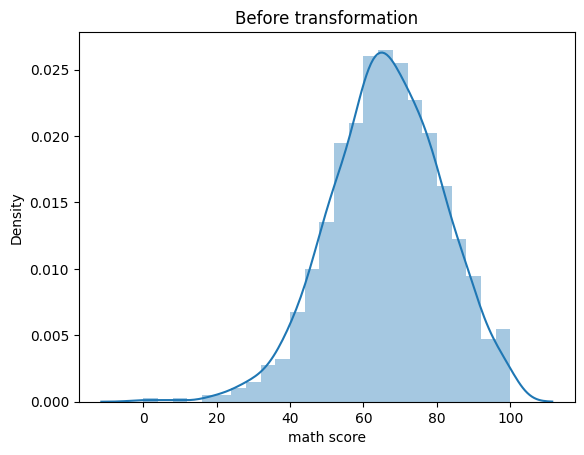

C:\Users\91620\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\91620\AppData\Local\Temp\ipykernel_26100\3867911317.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math score'])


OverflowError: cannot convert float infinity to integer

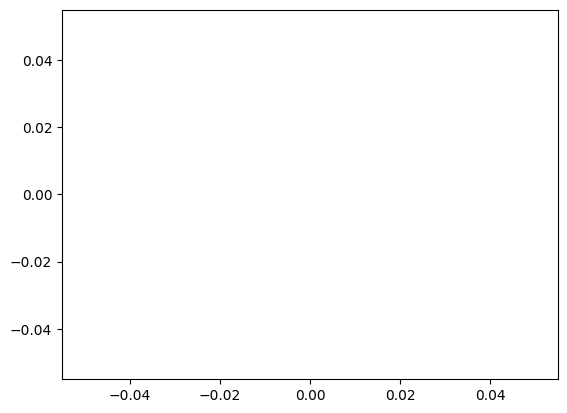

In [44]:
# Step 3: Data transformation
# Let's apply data transformation on 'math_score' variable to decrease the skewness and convert the distribution into a normal distribution.
sns.distplot(df['math score'])
plt.title('Before transformation')
plt.show()

df['math score'] = np.log(df['math score'])

sns.distplot(df['math score'])
plt.title('After transformation')
plt.show()